## 任务
#### 基于usa_housing_price.csv数据，建立线性回归模型，预测合理的房价；

1.以面积为输入变量，建立单因子模型，评估模型表现，可视化线性回归预测结果。

2.以income , house age , numbers of rooms , population , area 为输入变量，建立多因子模型，评估模型表现。

3.预测
income = 65000 , House Age = 5 , Number of Rooms = 5 , Population = 30000 , size = 200 的合理价格。

In [1]:
#load the data 读取数据
import pandas as pd
import numpy as np
data = pd.read_csv('usa_housing_price.csv')
print(data.shape)# 打印数据的形状
data.head(10)# 显示前10行数据

(5000, 6)


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,size,Price
0,79545.45857,5.317139,7.009188,23086.80050,188.214212,1.059034e+06
1,79248.64245,4.997100,6.730821,40173.07217,160.042526,1.505891e+06
2,61287.06718,5.134110,8.512727,36882.15940,227.273545,1.058988e+06
3,63345.24005,3.811764,5.586729,34310.24283,164.816630,1.260617e+06
4,59982.19723,5.959445,7.839388,26354.10947,161.966659,6.309435e+05
5,80175.75416,6.011592,6.104512,26748.42842,156.534656,1.068138e+06
6,64698.46343,4.974664,8.147760,60828.24909,194.779709,1.502056e+06
7,78394.33928,4.010220,6.620478,36516.35897,163.536834,1.573937e+06
8,59927.66081,5.637874,6.393121,29387.39600,172.754233,7.988695e+05
9,81885.92718,6.576328,8.167688,40149.96575,197.800471,1.545155e+06


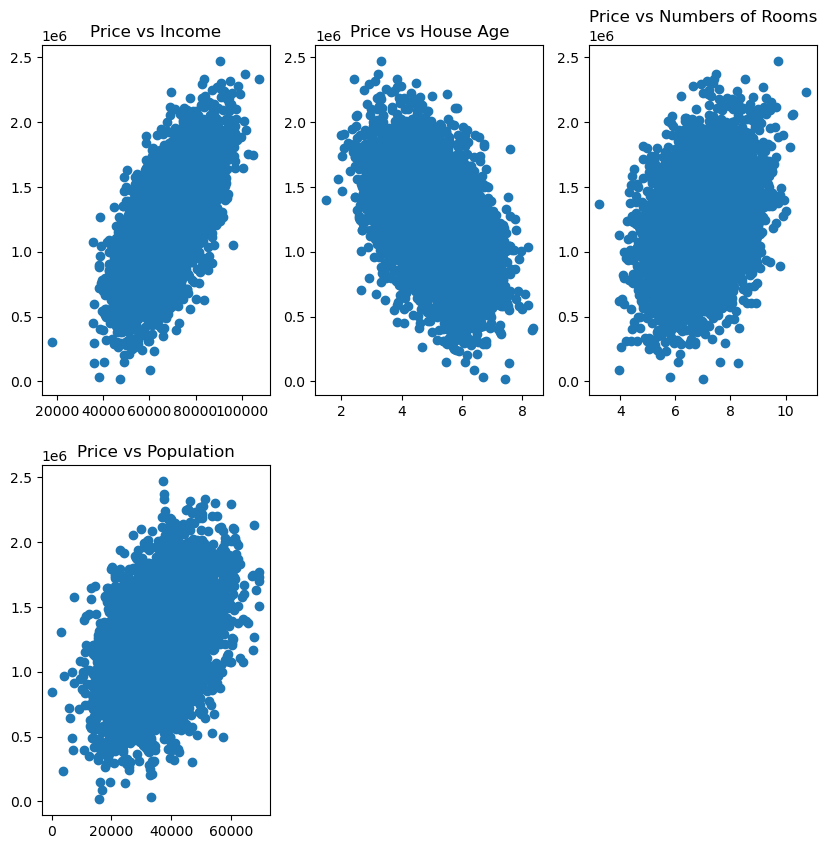

In [2]:
#把每个因子跟房价进行对比，可视化（使用了scatter;散点图）
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.figure( figsize = (10,10))# 创建一个10x10的图形窗口

# 绘制“收入”与“价格”的散点图
fig1 = plt.subplot(231)
plt.scatter(data.loc[:,'Avg. Area Income'],data.loc[: , 'Price'])
plt.title('Price vs Income')

# 绘制“房屋年龄”与“价格”的散点图
fig2 = plt.subplot(232)
plt.scatter(data.loc[:,'Avg. Area House Age'],data.loc[: , 'Price'])
plt.title('Price vs House Age')

# 绘制“房间数”与“价格”的散点图
fig3 = plt.subplot(233)
plt.scatter(data.loc[:,'Avg. Area Number of Rooms'],data.loc[: , 'Price'])
plt.title('Price vs Numbers of Rooms')

# 绘制“人口”与“价格”的散点图
fig4 = plt.subplot(234)
plt.scatter(data.loc[:,'Area Population'],data.loc[: , 'Price'])
plt.title('Price vs Population')

# 显示所有图形
plt.show()

在以上的可视化图中可以发现：
只有prie vs house age 的图示下降的（房子越老，价格越低），
而其他的因子的对比都是有比较上升的趋势的

##### 任务1.
以面积为输入变量，建立单因子模型，评估模型表现，可视化线性回归预测结果。

In [3]:
# 赋值：定义 x 和 y
x = data.loc[: , 'size'] # 选择“size”作为特征
y = data.loc[: , 'Price'] # 选择“Price”作为目标变量
x.head() # 显示 x 的前五行数据


0    188.214212
1    160.042526
2    227.273545
3    164.816630
4    161.966659
Name: size, dtype: float64

In [4]:
x = np.array(x).reshape(-1,1) # 将 x 转换为 numpy 数组并重塑为列向量
print(x.shape , type(x))# 打印 x 的形状和类型

(5000, 1) <class 'numpy.ndarray'>


In [5]:
#（建立模型）set up the linear regression model
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()

#train the model训练模型
lr1.fit(x,y)


LinearRegression()

In [6]:
#calculate the price vs size 预测房价
y_predict1 = lr1.predict(x)
print(y_predict1)# 打印预测的结果

[1276881.85636622 1173363.58767144 1420407.32457443 ... 1097848.86467426
 1264502.88144558 1131278.58816273]


In [7]:
#evaluate the model(模型评估)
from sklearn.metrics import mean_squared_error , r2_score
mean_squared_error_1 = mean_squared_error(y ,y_predict1)
r2_score_1 = r2_score(y , y_predict1)
print("MSE:",mean_squared_error_1,"and" ,"R2:", r2_score_1)

MSE: 108771672553.6264 and R2: 0.1275031240418234


这里发现mse和r2表现得都不好

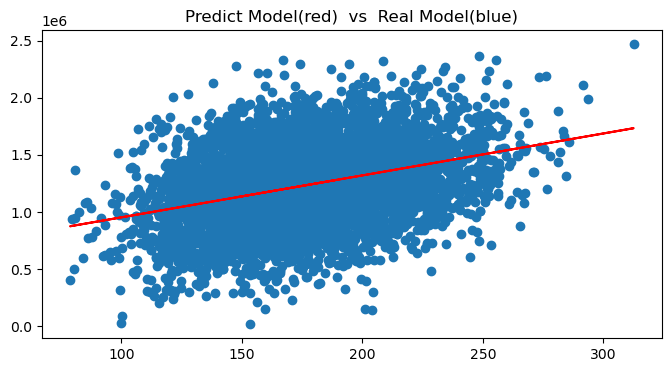

In [8]:
# 可视化模型预测结果与实际结果
from matplotlib import pyplot as plt
fig5 = plt.figure(figsize = (8,4))
plt.scatter(x,y)# 绘制实际数据的散点图
plt.plot(x,y_predict1,'red')# 绘制预测结果的直线图
plt.title("Predict Model(red)  vs  Real Model(blue)")

plt.show()




结论；在研究房子的市值时，我们发现仅使用单一因子（例如房子面积）来衡量房价是远远不够的。虽然房子面积确实是一个重要的因素，但房价还受到许多其他因素的影响。

即，一元线性回归的局限性在此

#### 任务2
以income , house age , numbers of rooms , population , area 为输入变量，建立多因子模型，评估模型表现。

In [9]:
#define x_multi 定义多因子模型的特征 x_multi 和目标变量 y
x_multi = data.drop(['Price'] , axis = 1) #从 DataFrame data 中删除名为“Price”的列，axis=1 表示按列删除。如果 axis=0 则表示按行删除
y = data.loc[: , 'Price'] #实际价格 ,目标变量为“Price”
x_multi # 显示多因子特征数据


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,size
0,79545.45857,5.317139,7.009188,23086.80050,188.214212
1,79248.64245,4.997100,6.730821,40173.07217,160.042526
2,61287.06718,5.134110,8.512727,36882.15940,227.273545
3,63345.24005,3.811764,5.586729,34310.24283,164.816630
4,59982.19723,5.959445,7.839388,26354.10947,161.966659
...,...,...,...,...,...
4995,60567.94414,3.169638,6.137356,22837.36103,161.641403
4996,78491.27543,4.000865,6.576763,25616.11549,159.164596
4997,63390.68689,3.749409,4.805081,33266.14549,139.491785
4998,68001.33124,5.465612,7.130144,42625.62016,184.845371


In [10]:
#set up 2nd linear model(建立模型) ,# 建立第二个线性回归模型（多因子模型）
lr_multi = LinearRegression()

#training the model（模型的训练） 训练多因子模型
lr_multi.fit(x_multi , y)


LinearRegression()

In [11]:
#make prediction (模型预测) 预测房价（多因子模型）
y_predict_multi = lr_multi.predict(x_multi)
print(y_predict_multi)# 打印多因子模型的预测结果


[1223968.89166085 1497306.33188629 1250884.31019438 ... 1020693.92390376
 1260503.36914586 1302737.7915763 ]


In [12]:
# 多因子模型的评估
from sklearn.metrics import mean_squared_error , r2_score
mean_squared_error_multi = mean_squared_error(y ,y_predict_multi)
r2_score_multi = r2_score(y , y_predict_multi)
print("multi_predictive; ","MSE:",mean_squared_error_multi,"      " ,"R2:", r2_score_multi)

multi_predictive;  MSE: 10219846512.177862        R2: 0.9180229195220739


In [13]:
print("one_predictive; ","MSE:",mean_squared_error_1,"      " ,"R2:", r2_score_1)

one_predictive;  MSE: 108771672553.6264        R2: 0.1275031240418234


再以上的进行mse和r2 的预测当中，发现多因子的mse比单因子的mse少了10倍（相对于接近0），而多因子的r2比单因子的r2 更加的接近了1.

结论；多因子预测更好

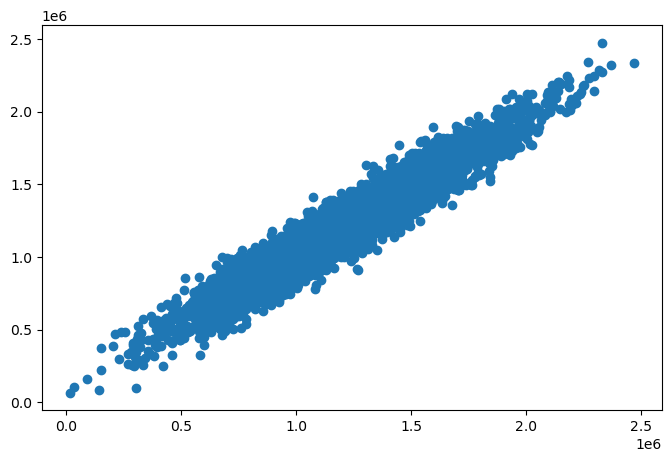

In [14]:
#以下的两个例子（图形）都是把实际y值和预测y值进行画图，来看它们之间的集中度的
#而不是多种因子和价格的图（这个是难点要理解好）

# 绘制实际价格与预测价格的散点图（多因子模型）
fig7 = plt.figure(figsize=(8,5))
plt.scatter(y , y_predict_multi)
plt.show()

# y_predict_multi 是多因子模型（预测房价），（面积，房间数，人口等等  vs  price价格）

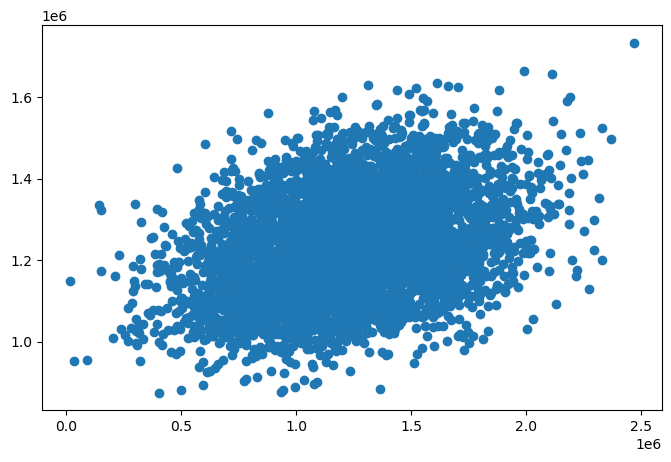

In [15]:
# 绘制实际价格与预测价格的散点图（单因子模型）
fig8 = plt.figure(figsize=(8,5))
plt.scatter(y , y_predict1)
plt.show()

#y 是实际价格price
#y_prediect1 是预测房价（是单因子预测模型，即面积 vs price）

那么通过图形化的手段也可以发现多因子的模型更贴合，更拟合，集中度更好相对于单因子的模型



## 以下是重点

### plt.scatter(x, y) 用于可视化自变量和因变量之间的关系。
### plt.scatter(y, y_predict) 用于可视化模型预测值和实际值之间的关系，以评估模型性能。
每种绘图方法都在不同的情境下提供了有价值的信息，有助于不同方面的分析和理解。

plt.scatter(x_multi, y) 不太适用于直接绘制多元线性回归中的多个自变量与因变量之间的关系，因为 x_multi 是包含多个特征的数据集。在散点图中，x 轴和 y 轴通常各自表示单个变量，而 x_multi 包含多个变量，这种情况下，Matplotlib 无法直接处理

## 任务3
预测 income = 65000 , House Age = 5 , Number of Rooms = 5 , Population = 30000 , size = 200 的合理价格


In [16]:
#针对具体的数据进行合理的房价预测
x_test = [65000,5,5,30000,200] # 测试数据：收入、房龄、房间数、人口、面积
x_test = np.array(x_test).reshape(1,-1)# 转换为 numpy 数组并重塑
print(x_test)
x_test.shape

[[65000     5     5 30000   200]]


(1, 5)

In [18]:
# 使用多因子模型进行预测
y_test_predict = lr_multi.predict(x_test)
print(y_test_predict)

[817052.19516298]


C:\Users\Nurbek\anaconda3_new\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


以上的的数字结果817052.19516298，是根据自变量来预测的因变量（即

线性回归房价实战summary:

1、通过搭建线性回归模型，实现单因子的房屋价格预测；

2、在单因子模型效果不好的情况下，通过考虑更多的因子，建立了多因子模型；

3、多因子模型达到了更好的预测效果，r2分数为0.91；

4、实现了预测结果的可视化，直观对比预测价格与实际价格的差异。
